In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE=256
CHANNELS=3

train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator=train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
#     save_to_dir="AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [3]:
for image_batch,label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.75090665 0.7430635  0.78620076]
  [0.7586715  0.7508284  0.79396564]
  [0.76816684 0.7603237  0.80346096]
  ...
  [0.6468587  0.635094   0.67823124]
  [0.6501726  0.6384079  0.68154514]
  [0.66012037 0.64835566 0.6914929 ]]

 [[0.7498014  0.74195826 0.7850955 ]
  [0.7575663  0.74972314 0.7928604 ]
  [0.7659562  0.7581131  0.8012504 ]
  ...
  [0.71010864 0.69834393 0.7414812 ]
  [0.70950496 0.69774026 0.7408775 ]
  [0.7028731  0.6911084  0.73424566]]

 [[0.74885786 0.7410147  0.784152  ]
  [0.7564609  0.74861777 0.791755  ]
  [0.7642258  0.75638264 0.7995199 ]
  ...
  [0.6695476  0.6577829  0.70092016]
  [0.66916734 0.65740263 0.7005399 ]
  [0.6735886  0.66182387 0.7049611 ]]

 ...

 [[0.6949829  0.68713975 0.7420417 ]
  [0.6944303  0.68658715 0.7414891 ]
  [0.69339746 0.6855543  0.7404563 ]
  ...
  [0.5779111  0.57006794 0.6249699 ]
  [0.59959817 0.59175503 0.646657  ]
  [0.5911861  0.58334297 0.6382449 ]]

 [[0.6850661  0.67722297 0.7321249 ]
  [0.68340814 0.67556494 0.73046696]


In [4]:
val_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

val_generator=train_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
#     save_to_dir="AugmentedImages"
)

Found 215 images belonging to 3 classes.


In [5]:
test_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator=train_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
#     save_to_dir="AugmentedImages"
)

Found 431 images belonging to 3 classes.


In [6]:
# BATCH_SIZE=32
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [8]:
model.compile(
 optimizer='adam',
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
 metrics=['accuracy']   
)

In [9]:
history=model.fit(
   train_generator,
   steps_per_epoch=47,
   batch_size=32,
   validation_data=val_generator,
   validation_steps=6,
   verbose=1,
   epochs=20
)

Epoch 1/20
47/47 [==============================] - 43s 898ms/step - loss: 0.9072 - accuracy: 0.4695 - val_loss: 0.8485 - val_accuracy: 0.4844
Epoch 2/20
47/47 [==============================] - 45s 947ms/step - loss: 0.7917 - accuracy: 0.6452 - val_loss: 0.7572 - val_accuracy: 0.5833
Epoch 3/20
47/47 [==============================] - 44s 932ms/step - loss: 0.5067 - accuracy: 0.7856 - val_loss: 0.4038 - val_accuracy: 0.8229
Epoch 4/20
47/47 [==============================] - 44s 926ms/step - loss: 0.2563 - accuracy: 0.8989 - val_loss: 0.5909 - val_accuracy: 0.7865
Epoch 5/20
47/47 [==============================] - 45s 955ms/step - loss: 0.2403 - accuracy: 0.9071 - val_loss: 0.1358 - val_accuracy: 0.9531
Epoch 6/20
47/47 [==============================] - 44s 937ms/step - loss: 0.2452 - accuracy: 0.9138 - val_loss: 0.1505 - val_accuracy: 0.9688
Epoch 7/20
47/47 [==============================] - 46s 965ms/step - loss: 0.2180 - accuracy: 0.9199 - val_loss: 0.1776 - val_accuracy: 0.9323

In [10]:
scores=model.evaluate(test_generator)

14/14 [==============================] - 6s 400ms/step - loss: 0.0921 - accuracy: 0.9791


In [11]:
scores

[0.09209439158439636, 0.9791183471679688]

# Plotting the Accuracy and Loss Curves

In [12]:
history

In [13]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
type(history.history['loss'])

list

In [16]:
len(history.history['loss'])

20

In [17]:
history.history['loss'][:5]

[0.9072275757789612,
 0.791695773601532,
 0.5067346096038818,
 0.25633054971694946,
 0.24027946591377258]

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [19]:
val_acc

[0.484375,
 0.5833333134651184,
 0.8229166865348816,
 0.7864583134651184,
 0.953125,
 0.96875,
 0.9322916865348816,
 0.9739583134651184,
 0.984375,
 0.9583333134651184,
 0.9895833134651184,
 0.96875,
 1.0,
 0.9895833134651184,
 0.9947916865348816,
 0.984375,
 0.9947916865348816,
 0.9895833134651184,
 0.9739583134651184,
 1.0]

In [20]:
acc

[0.4694708287715912,
 0.6451831459999084,
 0.7856173515319824,
 0.8989145159721375,
 0.9070556163787842,
 0.9138398766517639,
 0.9199457168579102,
 0.9375848174095154,
 0.9497964978218079,
 0.977393627166748,
 0.9715061187744141,
 0.9586160182952881,
 0.9674355387687683,
 0.9640434384346008,
 0.9735413789749146,
 0.9877883195877075,
 0.9891451597213745,
 0.9911804795265198,
 0.9640434384346008,
 0.974219799041748]

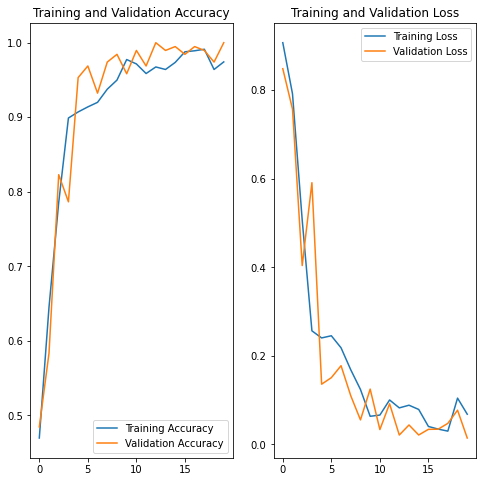

In [21]:
EPOCHS=20
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run Prediction on sample image

First image to predict
Actual label: Potato___Late_blight
1/1 [==============================] - 0s 257ms/step
Predicted Label: Potato___Late_blight


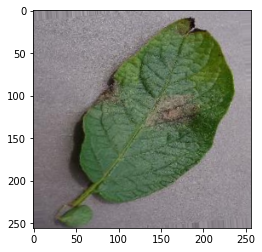

In [22]:
import numpy as np
class_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

for images_batch,labels_batch in test_generator:
    first_image=images_batch[0]
    first_label=int(labels_batch[0])
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])
    break

# Write a function for inference

In [23]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i])
    img_array=tf.expand_dims(img_array,0)#create a batch
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

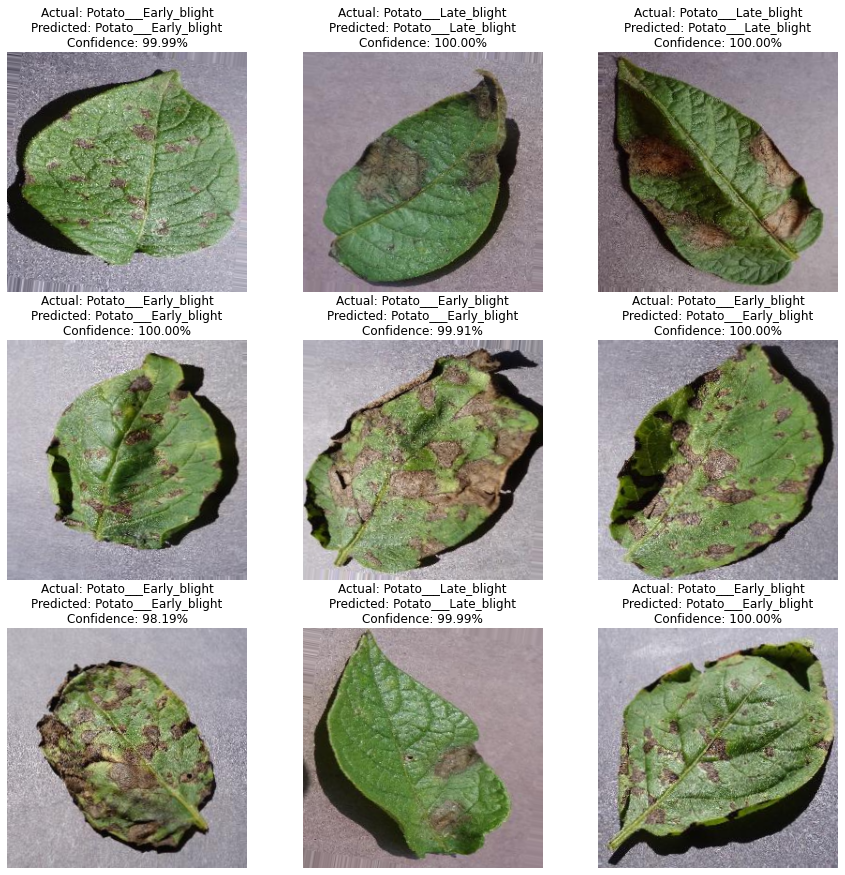

In [25]:
tf.keras.utils.disable_interactive_logging()

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        # Predict the class and confidence using the model
        predicted_probabilities = model.predict(tf.expand_dims(images[i], axis=0))
        predicted_class = class_names[predicted_probabilities.argmax()]
        confidence = predicted_probabilities.max() * 100
        
        actual_class = class_names[int(labels[i])]
        
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
        
        plt.axis("off")
    break    

In [26]:
model.save("../potatoes.h5")